# <span style="color:red">*Chuẩn bị thu thập và giới thiệu dữ liệu các điểm khóa trên mặt người (Facial Keypoints Detection):*</span> 

Dữ liệu mình sử dụng  là phát hiện tọa độ điểm chính trên khuôn mặt (mắt, mũi, miệng). Mình tải dữ liệu mẫu tọa độ điểm .csv và đặt nó vào một thư mục data/. sau đó dùng thư viện pandas để đọc.

In [1]:
import pandas as pd

### Giới thiệu bộ dữ liệu:

Detecing facial keypoints is a very challenging problem.  Facial features vary greatly from one individual to another, and even for a single individual, there is a large amount of variation due to 3D pose, size, position, viewing angle, and illumination conditions. Computer vision research has come a long way in addressing these difficulties, but there remain many opportunities for improvement.  

Bộ dữ liệu này là bộ dữ liệu mở của trang web kaggle. Với mục tiêu của bộ dữ liệu điểm trên khuôn mặt này là dự đoán các vị trí quan trọng trên khuôn mặt. Mình có thể có các ứng dụng chẳng hạn như:  

khuôn mặt theo dõi trong hình ảnh và video  
phân tích nét mặt  
phát hiện các dấu hiệu dị dạng khuôn mặt để chẩn đoán y tế  
sinh trắc học / nhận diện khuôn mặt  


In [2]:
# Tập dữ liệu vị trí điểm khuôn mặt + vị trí pixel điểm ảnh lưu trong csv để dựng lên hình ảnh khuôn mặt. 
# Vì thế mình chỉ cần chỉ tập csv là có cả tọa độ và ảnh. Tập này để huấn luyện
df = pd.read_csv('training.csv')

In [3]:
# Mình xuất vd 5 mẫu
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
# Tập dữ liệu có 31 đặt điểm vị trí, có 7049 dữ liệu
df.shape

(7049, 31)


# <span style="color:red">*Thống kê và truy vấn dữ liệu:*</span> 

### <span style="color:red">*Training set, test set là gì?:*</span> 
Giả sử bạn đang luyện thi đại học và bạn có 10 bộ đề để luyện thi. Nếu bạn học và chữa cả 10 đề thì bạn sẽ không thể ước lượng được điểm thi của bạn khoảng bao nhiêu, dẫn đến bạn không chọn được trường phù hợp.

Thế là bạn nghĩ ra một giải pháp tốt hơn:
* Trong 10 đề đấy chỉ lấy 8 đề học và chữa chi tiết để rèn luyện bản thân ( 8 đề được xem là **training set**, có thể hiểu là dữ liệu dùng để dạy cho model học.)
* Còn để 2 đề lại tự mình giả sử coi như là đề thi thật để đánh giá bản thân lần cuối. ( 2 đề xem  là **validation set**, là để đánh giá xem model hiện tại có tốt không, thường được dùng để chỉnh các tham số của model.)
* Đề thi đại học thật mình đi thi là **test set**, là để đánh giá xem model hoạt động với dữ liệu thực tế có tốt không
	


Về tập dữ liệu điểm mặt, thì trong đó 30 cột đầu tiên biểu thị dữ liệu điểm chính (15 tọa độ x và 15 tọa độ y). Và mình lấy bộ dữ liệu khuôn mặt trên là tập **training set**



In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def string2image(string):
    """Hàm chuyển chuổi tên hình ảnh thành các phần từ trong num array."""
    return np.array([int(item) for item in string.split()]).reshape((96, 96))

def plot_faces(nrows=5, ncols=5):
    """Thê trích xuất ngẫu nhiên khuôn mặt trong tập dừ liệu đào tạo train."""
    selection = np.random.choice(df.index, size=(nrows*ncols), replace=False)
    image_strings = df.loc[selection]['Image']
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, ax in zip(image_strings, axes.ravel()):
        ax.imshow(string2image(string), cmap='gray')
        ax.axis('off')

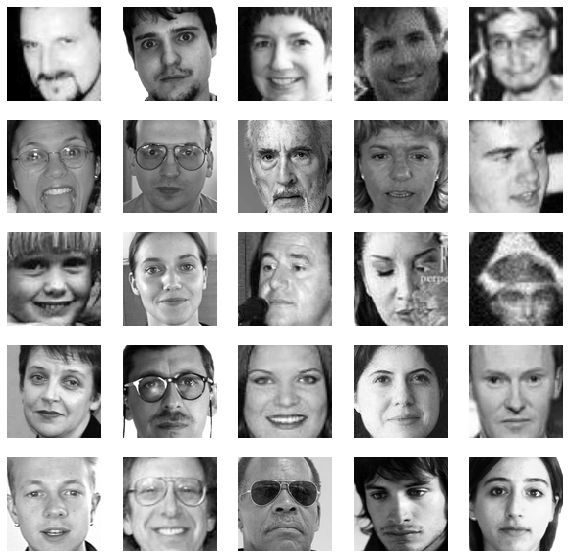

In [7]:
# Mình xuất mẫu thử dữ liệu là các khuôn mặt trong file csv
plot_faces()

Bây giờ mình thêm vào biểu đồ các điểm chính quan trọng trên khuôn mặt (mắt, mũi, miệng) đã được gắn thẻ. Đầu tiên, mình lấy một ví dụ truy xuất 1 khuôn mặt và gắn vị trí:

In [8]:
keypoint_cols = list(df.columns)[:-1]

In [9]:
xy = df.iloc[0][keypoint_cols].values.reshape((15, 2))
xy 

array([[66.0335639098, 39.0022736842],
       [30.2270075188, 36.4216781955],
       [59.582075188000005, 39.647422556399995],
       [73.1303458647, 39.9699969925],
       [36.3565714286, 37.3894015038],
       [23.4528721805, 37.3894015038],
       [56.9532631579, 29.0336481203],
       [80.2271278195, 32.2281383459],
       [40.2276090226, 29.0023218045],
       [16.3563789474, 29.6474706767],
       [44.4205714286, 57.0668030075],
       [61.1953082707, 79.9701654135],
       [28.6144962406, 77.38899248119999],
       [43.3126015038, 72.9354586466],
       [43.1307067669, 84.4857744361]], dtype=object)

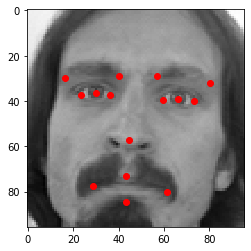

In [10]:
plt.plot(xy[:, 0], xy[:, 1], 'ro')
plt.imshow(string2image(df.iloc[0]['Image']), cmap='gray')

Phía trên mình đã thử gắn tọa độ điểm quan trọng lên khuôn mặt và khá thành công, tiếp theo mình sẽ viết hàm gán lên tất  cả các ảnh còn lại

In [11]:
def plot_faces_with_keypoints(nrows=5, ncols=5):
    """Mình xuất kết quả ảnh khuôn mặt có các điểm khóa."""
    selection = np.random.choice(df.index, size=(nrows*ncols), replace=False)
    image_strings = df.loc[selection]['Image']
    keypoint_cols = list(df.columns)[:-1]
    keypoints = df.loc[selection][keypoint_cols]
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, (iloc, keypoint), ax in zip(image_strings, keypoints.iterrows(), axes.ravel()):
        xy = keypoint.values.reshape((15, 2))
        ax.imshow(string2image(string), cmap='gray')
        ax.plot(xy[:, 0], xy[:, 1], 'ro')
        ax.axis('off')

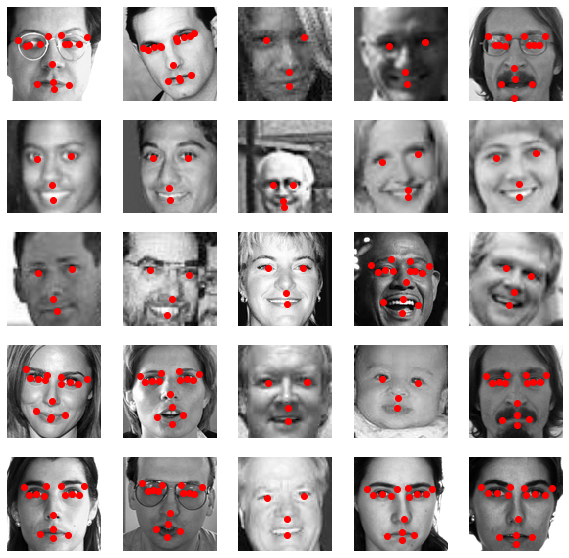

In [12]:
plot_faces_with_keypoints()

## <span style="color:red">*Tiền xử lý dữ liệu :*</span> 
Qua bộ dữ liệu của nó, mình có thể nhận thấy:

* Một số hình ảnh có độ phân giải cao, một số hình ảnh thấp
* Một số hình ảnh có tất cả 15 điểm chính, trong khi một số chỉ nhận được có một vài điểm trên khuôn mặt, có cái lại bị sai nữa  

Mình hãy làm một số thống kê về các điểm chính để điều tra quan sát cuối cùng đó:

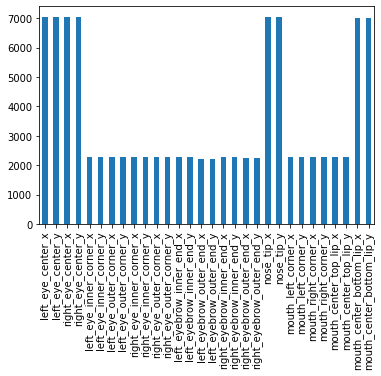

In [13]:
df.describe().loc['count'].plot.bar()

Qua dữ liệu như trên mình thấy chỉ có 2000 hình ảnh là "chất lượng cao" với chứa tất cả các điểm chính (cột là số lượng ảnh, hàng là các đặt trưng có gắn điểm, mình thấy ở mức 2000 mới có đủ các đặt trưng). Trong khi 5000 hình ảnh khác là "chất lượng thấp" chỉ có 4 điểm chính được dán nhãn.  
  
Mình bắt đầu đào tạo dữ liệu với hình ảnh chất lượng cao (có đủ đặt trưng) 

In [14]:
# Hàm của panda để loại bỏ cá dữ liệu thiếu, mình chỉ lấy >2000 dữ liệu đủ
fully_annotated = df.dropna()

In [15]:
# Qua kích thước mình lọc lại còn 2140 dữ liệu và 31 đặt trưng
fully_annotated.shape

(2140, 31)

# <span style="color:red">*Xây dựng mô hình Keras :*</span>  

Bây giờ vào phần học máy. Mình sẽ xây dựng mô hình với framwork Keras trên dữ liệu mình đã xử lý như trên. Trên thực tế, mình phải qua bước tiền xử lý dữ liệu trước, mình dùng scikit-learn pipelines
Các bước làm việc với luồng dữ liệu: 
1. Tiền xử lý dữ liệu thô thành các đặc trưng hữu ích 
2. Chuyển hóa dữ liệu để phù hợp với từng thuật toán học máy cụ thể 
3. huấn luyện dữ liệu
4. Đánh giá mô hình

Ý tưởng đằng sau pipelines là nó cho phép mình dễ dàng theo dõi các thay đổi của dữ liệu được áp dụng cho dữ liệu từ bước 1 tiền xử lý cho đến bước 3 huấn luyện trong mô hình của mình. Mình cần hai giá trị: một cho đầu vào và một cho đầu ra.

__Về xây dựng mô hình tổng thể bằng framwork Keras, mình có các bước:__

1. Chuẩn bị dữ liệu (dataset)

2. Xây dựng mô hình model ( áp dụng các kiến thức được trình bày trong neural network và convolutional neural network sẽ trình bày dưới. Tuy nhiên bước backpropagation rất khó cài đặt bằng thuần code thông thường=> chính vì thế dùng framework keras). Chỉ cần định nghĩa model và loss function, framework sẽ lo phần backpropagation.!!!

3. Thực hiện backpropagation và áp dụng gradient descent để tìm các tham số parameter gồm weight và bias để tối ưu loss function.

4. Dự đoán dữ liệu mới bằng model với các hệ số tìm được ở trên. 
![image](https://i.imgur.com/iaiFREu.png)

__Lơi ích khi sử dụng framwork:__  
Việc định nghĩa layer, activation function, loss function đơn giản hơn cho người dùng. Ví dụ để thêm layer trong neural network chỉ cần báo là layer có bao nhiêu node và dùng hàm activation gì. Và tối ưu việc tính toán trên CPU và GPU.


Ngoài cách đánh giá độ chính sát và độ lỗi giữa tập huấn luyện train và tập kiểm tra test, mình còn đánh giá cả cách xây dựng mô hình theo nhiều hướng khác nhau. Đầu tiên mình thử cài đặt mô thì không áp dụng các phương pháp xử lý ảnh, cũng như ko áp dụng các kỹ thuật xử lý ảnh như convolution, max pooling, denes...(kiến thức mình sẽ trình bày ở dưới) và đánh giá. Sau đó mình áp dụng các kỹ thuật xử lý ảnh và xử lý tối ưu mạng máy học, đánh giá và để so sánh cả 2 mô hình!!!

In [16]:
X = np.stack([string2image(string) for string in fully_annotated['Image']]).astype(np.float)[:, :, :, np.newaxis]

In [17]:
y = np.vstack(fully_annotated[fully_annotated.columns[:-1]].values)

In [18]:
# Đầu Vào 2140 tấm ảnh dữ liệu kích thước 96x96, 1 kênh màu là xám, kiểu dữ liệu float 
X.shape, X.dtype

((2140, 96, 96, 1), dtype('float64'))

In [19]:
# Đầu ra 2140 tấm ảnh có chứa 30 giá vị trí đặt trưng
y.shape, y.dtype

((2140, 30), dtype('float64'))

In [20]:
y

array([[66.03356391, 39.00227368, 30.22700752, ..., 72.93545865,
        43.13070677, 84.48577444],
       [64.33293617, 34.9700766 , 29.9492766 , ..., 70.26655319,
        45.46791489, 85.48017021],
       [65.05705263, 34.90964211, 30.90378947, ..., 70.19178947,
        47.27494737, 78.65936842],
       ...,
       [68.43086625, 38.65197512, 28.89585706, ..., 79.04312978,
        47.17673868, 89.54452244],
       [64.15217959, 30.69159184, 27.00089796, ..., 79.30142857,
        58.61108571, 80.35554286],
       [66.6837551 , 34.48342857, 30.7844898 , ..., 75.96359236,
        52.92337132, 82.66106175]])

In [21]:
X_train = X / 255.

Tại sao mình phải lấy tất cả giá trị điểm ảnh (có 96*96 điểm ảnh) của 2140 ảnh chia cho 255? Vì mỗi giá tị mỗi kênh màu (R,G,B) lưu bằng 8 bit, khoảng giá trị trong [0,255], nghĩa là giá trị màu toàn diện của 1 điểm là: 256*256*256. Mình chia 255 mục đích là đưa về khoảng [0,1] 0 là 0 và 1 là 255. Mục đích của bước này là scale lại từng pixel của lớp đữ liệu đầu tiên nạp vào mô hình (gồm 2140 tấm ảnh dữ liệu kích thước 96x96, 1 kênh màu xám).

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

output_pipe = make_pipeline(
    MinMaxScaler(feature_range=(-1, 1))
)

y_train = output_pipe.fit_transform(y)

In [23]:
#Bước trên  để tùy chỉnh giá trị trong khoảng [-1,1] của các giá trị vị trí 30 tọa độ 
y_train.shape

(2140, 30)

In [24]:
y_train

array([[ 0.20605832,  0.36050841, -0.04088513, ..., -0.12808628,
        -0.31385276,  0.4129507 ],
       [ 0.09334934, -0.00113295, -0.06444905, ..., -0.27158625,
        -0.15480756,  0.46450493],
       [ 0.14134011, -0.00655322,  0.01653603, ..., -0.2756061 ,
        -0.03184041,  0.11088194],
       ...,
       [ 0.36493936,  0.32909068, -0.15382581, ...,  0.20030702,
        -0.03852343,  0.67522039],
       [ 0.08136972, -0.38486345, -0.31460249, ...,  0.21419506,
         0.73957498,  0.19881974],
       [ 0.2491497 , -0.04477964,  0.00641412, ...,  0.03472845,
         0.35253044,  0.31834886]])

__Trước khi cài mô hình, mình sẽ đề cập đến các kiến thức khái niệm cơ bản và mô hình sử dụng:__  
## <span style="color:red">*Model là gì?  weight là gì?:*</span>  
Ví dụ bạn có dữ liệu về diện tích và giá nhà, giờ có một ngôi nhà mới bạn muốn ước tính xem giá ngôi nhà đó khoảng bao nhiêu, khi bạn có dữ liệu về diện tích và giá bán của 30 căn nhà như sau:
![image](https://i.imgur.com/8vnlrnn.png)

Nếu giờ yêu cầu bạn ước lượng nhà 50 mét vuông khoảng bao nhiêu tiền thì bạn sẽ làm thế nào? Vẽ một đường thẳng gần với các điểm trên nhất và tính giá nhà ở điểm 50.
⇒ Với máy lúc học dữ liệu rèn luyện __Training__ để tìm đường thằng chuẩn gần với các điểm. __Đường thẳng đó là Model.__

Mình đặt phương trình đường thẳng Model có dạng __y = ax + b__:
![image](https://i.imgur.com/t1hpygm.png)
Mình đặt a =  w1 và b = w0 ⇒ : y= w1 * x + w0 ⇒ Lúc này, nếu x là diện tích nhà và y là giá tiền thì w1, w0 chính là tham số hiệu chính vị trí của đường thẳng, nói cách khác hiệu chỉnh đường thẳng trên so với các điểm dữ liệu khớp. __⇒ Bài toán tìm w1, w0 vì nó là quyết định tính đúng đắn của dự đoán dữ liệu, và cũng là tìm weight phù hợp để mô hình đúng!__

## <span style="color:red">*Loss function là gì? Loss là gì?:*</span>  
Như phía trên, mình tìm w1, w2 bằng cách thêm giá trị ngẫu nhiên để tùy chỉnh, ví dụ w0=0, w1=1 sau đấy được chỉnh dần. Khi w0=0, w1=1 thì mình được đường thẳng y = x như hình dưới:
![image](https://i.imgur.com/NhXnga6.png)
Lúc này, nhìn hình thì mình cũng đã thấy là đường y =x nó lệch quá nhiều so với các điểm. VD như mình kiếm nhà có diện tích là 42 m vuông, nhưng với phương trình đường thẳng  y = x (do là có tham số w0=0, w1=1) thì dự đoán nó giá chỉ chỉ 42 triệu, nhưng thực tế phải là 625 triệu! Qúa tệ! Vậy để đánh giá được là tính lỗi của nó (là phương trình đường thẳng  y = x) là sai mức nào, hay nói cách khác là bộ tham số (w0, w1) = (0,1) trong phương trình ![image](https://i.imgur.com/9ZlGhVL.png)  tại ra đường thẳng model thể hiện đúng hay lỗi thế nào (w0, w1 phải giá trị thế nào).  

⇒  Mình cần có __1 hàm đánh giá__, mà ở đó giá trị kết quả của hàm đánh giá đó là nhỏ nhất thì kết quả đánh giá phương trình (model) là tốt nhất. __Đó là Loss function và kết quả gọi là Loss.__  

VD: Có 1 hàm Z đánh giá phương trình y = x với (w0, w1) = (0,1), hàm Z đó cho kết quả loss là 30, và kết quả 30 đó là quá lớn so với chuẩn dữ liệu đúng như phải thấp hơn 3.1  

## <span style="color:red">*Gradient descent là gì? learning_rate là gì? Epoch là gì?*</span>  
Gradient descent là  thuật toán tìm giá trị nhỏ nhất của hàm số f(x) dựa trên đạo hàm. Trong khi đó loss funtion là 1 hàm mà giá trị loss càn nhỏ thì đính đúng đắng của phương trình model càn cao (giá trị w0, w1 càn chuẩn khi chạy w0, w1 ngẫu nhiên) . Từ đó mình có thể vận dụng dùng Gradient descent để tim min của loss funtion:  
Trong hàm số f(x),  
* B1: Đặt x =  giá trị bất kỳ
* B2:  Lặp n số lần: x = x – learning_rate * f'(x) (learning_rate là hằng số không âm, ví dụ learning_rate = 0.001) cho đến khi B3 có f(x)  đủ nhỉ thì dừng lại
* B3: Tính lại f(x):  
__⇒ Điểm kết quả sẽ đi từ A -> C -> D dần về min =0 ! (từ đó mình có thể tìm min của loss funtion)__
![image](https://i.imgur.com/885fYRy.png)

Vậy thật sự tham số learning_rate  để làm gì? Là để hiệu chỉnh tối ưukích thước chạy thuật toán. Lý do như hình dưới:
![image](https://i.imgur.com/7zkGIwS.png)  
  
Ngoài giá trị hiệu chỉnh learning_rate, còn cần phải có thêm giá trị epoch:
![image](https://i.imgur.com/Ip4h2oQ.png)  

Vậy epoch là gì?  Là số lần lặp hết dữ liệu (đặt x) để tìm giá trị min của kết quả loss (hay số lần mà training set được duyệt qua một lần và weights được cập nhật). Như hình trên, đường màu xanh lá giá trị loss tìm đc theo trục y là thấp nhất, còn số lần chạy epoch theo trục x có xu hướng giảm dần và bắt đầu đều thẳng ngang nhanh nhất khi tìm được min.  

## <span style="color:red">*Logistic regression là gì?*</span>  
Vậy  linear regression với đầu ra là giá trị thực (Như dự đoán giá nhà là bao nhiêu?), thì với thuật toán logistic regression mình là nhị phân, ví dụ: email gửi đến hòm thư của bạn có phải spam hay không; u là u lành tính hay ác tính,…chung là kết quả là có hay ko, 1 trong 2.  
  
Ví dụ, bạn là nhân viên ngân hàng và 1 ngày bạn phải giải quyết số lượng hồ sơ là cả hơn 1000, 2000 hồ sơ để quyết định là có cho số người đó được vay tiền ngân hàng không. Bạn nhận thấy mối quan hệ giữa mức lương, thời gian công tác với khả năng họ chi trả để bạn có thể ra quyết định cho vay hay không.
![image](https://i.imgur.com/OLXv0of.png)  
![image](https://i.imgur.com/Y5dCB3r.png)   

Mình cần tìm đường thẳng xanh lá phân chia giữa các điểm cho vay và từ chối bằng thuật toán Gradient descent như trước. Sau đó mình có thể vận dụng, vd mức lương 6 triệu và 1 năm kinh nghiệm là không cho vay.
NHƯNG mình có gì có thể đảm bảo kết quả cho vay và không cho vay là CHẮC CHẮN là cho vay chưa khi chỉ dựa vào model đường  Gradient descent, khi chỉ phân đều theo 1 phương trình? VD như mình muốn là đảm bảo tỉ lệ đúng là 80% mới cho vay. Hay như trong đồ án xử lý ảnh của mình, nếu như chỉ xác định có lông là con chó như  Gradient descent thì không đúng, phải là lông giống bao nhiêu phần trăm là chó. Mình có thể xem Mô hình logistic regression là 1 phần Neural network nhưng đơn giản
![image](https://i.imgur.com/5npDc7s.png) 

## <span style="color:red">*Hàm sigmoid, ReLu là gì?*</span> 
Giờ mình cần tìm xác xuất có nên cho vay hay không và giá trị của hàm cần trong khoảng (0,1). Rõ ràng là giá trị của phương trình đường thẳng model bằng Gradient descent là ngoài khoảng (0,1).  
⇒ Nên cần một hàm mới luôn có giá trị liên tục trong khoảng (0,1). Đó là hàm sigmoid. Hay còn gọi là (activation function) Và mục đích của nó là phân lớp rõ dữ liệu phi tuyến tính.  
![image](https://i.imgur.com/LWGiV0A.png) 
VD Mình có dữ liệu đặt tính hoa:  
![image](https://i.imgur.com/aNGLWOQ.png) 
(Nếu như là dạng tuyến tính (đường thẳng) dễ thế này thì ko cần activation function như sigmoid là gì, 2 cụm đỏ và xanh tách cụm nhau 1 cách rõ ràng)
![image](https://i.imgur.com/EuhHL9q.png)  
Vậy thì với dữ liệu thế này sao, 1 nhóm xanh lẫn trong nhóm đỏ, vậy câu hỏi đặt ra là làm thế nào với một công thức tổ hợp tuyến tính như ban đầu mà dùng để phân lớp dữ liệu phi tuyến tính như hình trên được? Hay như xác xuất cho vay hay ko vay dựa vào các đặt trưng như khả năng chi trả, là phi tuyến như hình trên thì sao? Lúc đó mình phải đưa về tuyến tính trong khoảng [0,1]. Hàm kích hoạt được tạo ra để làm điều này, hàm kích hoạt đóng vai trò như một người trung gian có nhiệm vụ chuyển đổi, nén hoặc chế biến output  từ tuyến tính trở thành phi tuyến tính. Hay mình có thể nói là đạo hàm “bẻ cong đường thẳng” để khớp với mô hình. Với Sigmoid, đầu vào là số thực âm rất nhỏ sẽ cho đầu ra tiệm cận với 0, ngược lại, nếu đầu vào là một số thực dương lớn sẽ cho đầu ra là một số tiệm cận với 1

Nhưng hàm sigmoid có các khuyết điểm: 
* Hàm Sigmoid bão hào và triệt tiêu gradient: Một nhược điểm dễ nhận thấy là khi đầu vào có trị tuyệt đối lớn (rất âm hoặc rất dương), gradient của hàm số này sẽ rất gần với 0. Điều này đồng nghĩa với việc các hệ số w tương ứng với node đang xét sẽ gần như không được cập nhật (còn được gọi là vanishing gradient).  

* Hàm Sigmoid không có trung tâm là 0 gây khó khăn cho việc hội tụ (Nhìn đồ thị mình cũng có thể thấy, độ lệt có x =0)  
__(Sẽ xem sau)__  
==> Do mô hình của mình, vị trí điểm có khoảng rất lớn, vì thế chỉ 1 sự lệt nhỏ thôi cũng đưa ra kết quả khác (vd tọa độ điểm ở đầu mũi thì lệt xuống 1 ít thì là miệng), và qua nhiều lớp các giá trị sẽ phổ rộng hơn trong việc xử lý nhưng sigmoid lại đánh đồng tất cả giá trị điểm. __Chính vì thế Sigmoid không thể được sử dụng training các mạng có nhiều lớp, mình sẽ không sử dụng trong bài này.__


Còn với Hàm ReLu:  
![image](https://i.imgur.com/Z7EPLoU.png)  
* Nếu đầu vào của relu là giá trị <= 0, thì hàm sẽ tạo giá trị 0, nếu không, nếu đầu vào> 0 thì hàm sẽ xuất ra là giá trị như đầu vào  
  
Ưu điểm so với sigmoid:  
* Tốc độ hội tụ nhanh hơn hẳn. ReLU có tốc độ hội tụ nhanh gấp 6 lần Sigmoid do không bị bão hoà ở 2 đầu
* Tính toán nhanh hơn. Do Sigmoid sử dụng hàm exp và công thức phức tạp hơn ReLU rất nhiều do vậy sẽ tốn nhiều chi phí hơn để tính toán (ReLu bạn có thể dễ dàng thấy được chỉ 0 và giá trị còn lại, hàm đường thẳng rất đơn giản).  
  
Tuy nhiên vẫn có nhược điểm:  
* Với các node có giá trị nhỏ hơn 0, qua ReLU activation sẽ thành 0, hiện tượng đấy gọi là “Dying ReLU“  
* Khi learning rate lớn, các trọng số (weights) có thể thay đổi theo cách làm tất cả neuron dừng việc cập nhật  
  
Khắc phục khi dùng ReLu:  
* Chú ý tinh chỉnh learning rate và theo dõi tỷ lệ dead unit (các node bị die do rơi vào khoảng < 0 của ReLU),
* Sigmoid và Tanh không thể được sử dụng training các mạng có nhiều lớp (mạng deep learning) do vấn đề vanishing gradient

## <span style="color:red">*Bias, Variance là gì?*</span> 
![image](https://i.imgur.com/1RsmO1a.png)
* __Variance__ (là dấu x co cụm (giá trị Variance nhỏ)  lại hay phân tách (giá trị Variance lớn) ra xa nhau):  là phương sai, biểu thị độ phân tán của các giá trị mà mô hình dự đoán so với giá trị thực tế.
 
* __Bias__ (là dấu x  có gần (bias nhỏ) hay xa (bias lớn)  giá trị vòng tròn tâm “truth” ko): nghĩa là độ lệch, biểu thị sự chênh lệch giữa giá trị trung bình mà mô hình dự đoán và giá trị thực tế của dữ liệu. Lý thuyết là thế, nhưng thực tế thì mình có thể hiểu đó là gì? Trong từ điển thì, bias là đường chéo, độ dốc, độ xiên, độ nghiêng, khuyng hướng, thiên vị, thiên về, thành kiến, độ dịch...Chung là 1 khái niệm lệch ra khỏi mức độ cân bằng hiện có.
 
* __Giá trị thật dữ liệu (ground truth)__ ở giữa tâm các đường tròn. Các dấu X là các giá trị dự đoán. Ta thấy nếu high bias thì giá trị dự đoán rất xa tâm. Tuy nhiên nếu high variance thì các giá trị dự đoán phân tán rộng dẫn đến việc ra giá trị thực tế. => Ta mong muốn low bias và low variance.

![image](https://i.imgur.com/wNHzLLl.png)
![image](https://i.imgur.com/s1CVki2.png)

Ở hình 1, thì đường phân chia có khá nhiều điểm bị lỗi => sự chênh lệch giữa mô hình dự đoán và giá trị thực tế của dữ liệu cao => high bias, hay còn được gọi là __underfitting__, ý hiểu là mô hình hiện tại đơn giản hơn và chưa mô tả được mô hình của dữ liệu thực tế.  
 
Ở hình 2, đường phân chia vẫn có lỗi nhưng ở mức chấp nhận được và nó có thể mô tả dữ liệu => low bias, low variance. Mô hình chuẩn.  
 
Ở hình 3, đường phân chia có thể dự đoán đúng tất cả các điểm trong training set nhưng vì nó không tổng quát hóa mô hình dữ liệu thực sự nên khi áp dụng dự đoán vào validation set thì sẽ có rất nhiều lỗi => high variance hay còn được gọi là __overfitting__, ý hiểu là mô hình hiện tại thực hiện tốt với dữ liệu trong traing set nhưng dự đoán không tốt với validation set.  
 
Thực ra khái niệm high bias và high variance khá trìu tượng và nhiều lúc dùng nhầm lẫn giữa thống kê và machine learning. Nên khái niệm hay được dùng hơn là underfitting và overfitting.  
  
Ví dụ khi luyện thi đại học, nếu bạn chỉ luyện khoảng 1-2 đề trước khi thi thì bạn sẽ bị underfitting vì bạn chưa hiểu hết cấu trúc, nội dung của đề thi. Tuy nhiên nếu bạn chỉ luyện kĩ 50 đề thầy cô giáo bạn soạn và đưa cho thì khả năng bạn sẽ bị overfitting với các đề mà thầy cô giáo các bạn soạn mà khi thi đại học có thể điểm số của các bạn vẫn tệ.  
  
__Đánh giá độ chính xác bias and variance__  
Có 2 thông số thường được sử dụng để đánh giá bias and variance của mô hình là training set error (độ lỗi với mô hình dữ liệu huấn luyện) và validation set error (độ lỗi mô hình ). Ví dụ error (1-accuracy) trong logistic regression.
Tiếp theo mình sẽ giải thích mô hình cơ bản:
![image](https://i.imgur.com/c3Emq0A.png)  

__Giải quyết high bias (underfitting)__: Ta cần tăng độ phức tạp của model
* Tăng số lượng hidden layer và số node trong mỗi hidden layer.
* Dùng nhiều epochs hơn để train model.
 
__Giải quyết high variance (overfitting)__: Ta cần tăng độ phong phú của dữ liệu model
* Thu thập thêm dữ liệu hoặc dùng tăng dữ liệu data augmentation (mình đã trình bày phía trên)
* Dùng regularization như: L1, L2, droupout?

## <span style="color:red">*Mô hình tuần tự (Sequential Model)*</span> 
* Tuần tự (Sequential) là một lớp mô hình (model layer) theo từng lớp. Tuần tự có nghĩa là có mình một đầu vào và 1 đầu ra duy nhất, gần giống như một đường ống dẫn (pipeline). 
* Lớp (layer) là một đơn vị trong một mạng lưới học tập sâu (deep learning network). Các lớp gồm weights w (trọng số),  activation, và bias.  
![image](https://i.imgur.com/68B16fx.png)

## <span style="color:red">*Deep Neural Network (DNN). Mô hình Neural network và giải thích thêm về bias và weight*</span> 

Như mình đã biết mô hình công thức của logistic regression trước, với w0 là được gọi là bias:
![image](https://i.imgur.com/BUppcx2.png)
gồm có 2 bước tính linear và áp sigmod (chuyển về 0,1)
![image](https://i.imgur.com/pWH9el6.png)
__Giải thích thêm về bias và bias và weight khác nhau chổ nào?:__  
Như định nghĩa trước, Bias là hệ số đầu vào 1*w0 (tất nhiên w0 là weight, w là từ viết tắc mà).
![image](https://i.imgur.com/vzQXgzJ.png)
Như hình trên, mình thấy quen quen? đúng vậy. Nó tương đồng với công thức đường y = ax+b mà mình đã giải thích đầu đề "Model là gì?" Chính thế, mình có thế thấy tương ứng a = weight, x = input và b là bias. Tham số a (weight), là độ chỉnh đường thẳng phân chia nhóm để mô hình đúng. Nếu a=0 thì tương ứng y = 0*x + b => y=b, lúc này đường này sẽ không có giá trị, hay nói cách khác, weigth chính là đại lượng trọng số chính, a ảnh hưởng đến đầu ra y.  
  
Còn b = bias thì sao? Vậy tại sao phải thêm bias là w0*1 vào? w0 là tham số dư à?. Mục đích thứ nhất là để tránh cho kết quả đầu ra y != 0, thì mình sẽ vẫn chạy được hàm kích hoạt (relu, sigmoid trong khoảng (0,1)). VD: y = ax + b, nếu như a=0 thì sẽ có dạng y = b, nếu như không có b, thì đó sẽ là giá trị 0, không thể dùng hàm kích hoạt.  Nêu như pt đường thẳng có dạng y = ax +b, với b chính là độ dịch để đi ra ngoài gốc tọa độ O, thì ta mới có thể phân vùng cần lấy đc. 
Hình trái là phương trình y =ax, ko có b và phải là y=ax +b có b  
![image](https://i.imgur.com/LfSaUB3.png)
![image](https://i.imgur.com/fJqSShT.png)
Đó tương tự với ta thêm w0 vào!. lúc này pt mới có dạng  
![image](https://i.imgur.com/w2WBDKF.png)  
(tương tự như y = ax + b, với b == 1*w0) mà ta đã biết. Công thêm ý nghĩa bias mà mình đã nói “biểu thị sự chênh lệch giữa giá trị trung bình mà mô hình dự đoán và giá trị thực tế của dữ liệu”. Lưu ý: các cặp node là w1*x1, w2*x2...nhưng với bia thì KHÔNG CÓ GIÁ TRỊ x mà là 1, w0*1  
Mình vào mô hình tổng quát:  
![image](https://i.imgur.com/nHEYnDV.png)  
* Trong đó, Layer đầu tiên là input layer, các layer ở giữa được gọi là hidden layer, layer cuối cùng được gọi là output layer. Các hình tròn được gọi là node. Mỗi mô hình luôn có 1 input layer, 1 output layer, có thể có hoặc không các hidden layer.  
* __Mỗi node trong hidden layer và output layer:__
-Liên kết với tất cả các node ở layer trước đó với các hệ số w riêng.  
-Mỗi node có 1 hệ số bias b riêng.  
-Diễn ra 2 bước: tính tổng linear và áp dụng activation function.  
VD:  
![image](https://i.imgur.com/5MBOEF7.png)





Như dưới mình dùng mô hình tuần tự Sequential (một đầu vào và một đầu ra duy nhất, gần giống như một đường ống dẫn (pipeline)) của keras. Đầu vào mình chỉ cần 1 ảnh và kết quả là nhị phân (có/không đặc trưng) Ngoài mô hình tuần tự trên, mình còn có mô hình functional API. Mô hình functional API sẽ khắc phục được vấn đề 1 đầu vào - 1 đầu ra, mô hình sẽ có thể tùy chỉnh gắn vào bằng nhiều lớp khác, ngoài kiểu lớp trước - sau, để tạo ra mạng phức tạp. Nhưng hạn chế là tốc độ sẽ thấp, và mình cũng không có nhu cầu làm mạng phức tạp kiểu siamese. Mình mẫu 2 mô hình: 
![image](https://i.imgur.com/AtErATm.png) 

In [25]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D, Dense, GlobalAveragePooling2D
from IPython.display import SVG, Image
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [26]:
# Mình xây dựng hàm để vẽ mô hình.
def plot_keras_model(model, show_shapes=True, show_layer_names=True):
    return SVG(model_to_dot(model, show_shapes=show_shapes, show_layer_names=show_layer_names,dpi=70).create(prog='dot',format='svg'))


### <span style="color:red">*Dense là các hidden layer có đủ kết nối*</span> 
![image](https://i.imgur.com/sw41WTX.png)
* Như trong phần giải thích __"Convolutional Neural Network (CNN)"__ ở trên, Dense là các hidden layer được gọi bằng tên khác là fully connected layer. Tên gọi theo đúng ý nghĩa, là mọi node trong hidden layer được kết nối với tất cả các node trong layer trước.

* Lớp mật độ (dense layer) là hàm tuyến tính (linear operation) trong đó mọi đầu vào được kết nối với mọi đầu ra theo trọng số (weight) (do đó có trọng số n_inputs * n_outputs weights). Tiếp theo trong mô hình đặt units là 64. Đó là số lượng các nút (node) trong 1 lớp mật độ (dense layer). Giá trị của đơn vị luôn nằm giữa số lượng nút đầu vào có thể có
* Như trong mô hình dưới, mình cài 2 lớp hidden layer (fully connected layer = dense), với số node nội bộ từng lớp là 100, 30.
* Đầu tiên, lớp đầu vào của mình có 96*96 node (tương ứng các pixel ảnh), 1 giá trị cực kỳ lớn!, lớp đầu vào trả ra tương ứng số node. Sau đó, trích xuất 100 đặt điểm đặt trưng (node) kích hoạt relu để lọc giá trị xuống còn 100 node tương ứng tiếp tục với lớp ẩn tiếp theo sẽ còn 30 đặt trưng mà mình cần lấy.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               921700    
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3030      
Total params: 924,730
Trainable params: 924,730
Non-trainable params: 0
_________________________________________________________________


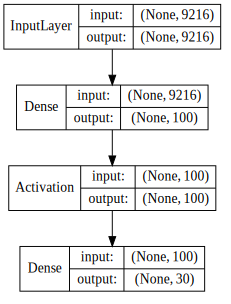

In [27]:
model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(96*96,)))
model.add(Activation('relu'))
model.add(Dense(30))
model.summary()
plot_keras_model(model, show_shapes=True, show_layer_names=False)

__Tiếp theo, mình sẽ đến phần phân phối dữ liệu, số lần chay mô hình bằng Stochastic gradient descent__
### <span style="color:red">*Stochastic gradient descent là gì?*</span> 
Như ta đã biết, thuật toán gradient descent chạy tốt nhưng số lượng dữ liệu trong training set chỉ là 30. Tuy nhiên nếu dữ liệu có kích thước lớn như ảnh và số lượng lớn hơn ví dụ 5000 thì việc tính đạo hàm với loss function với toàn bộ dữ liệu sẽ rất tốn thời gian. Nếu dữ liệu lớn thì cực kỳ chậm, vậy mình giải quyết vấn đề bằng cách như thế nào?  Và mini-batch gradient descent ra đời để giải quyết vấn đề này.  

Dựa vào số lượng dữ liệu cho mỗi lần thực hiện bước 2 trong gradient descent (“Lặp n số lần: x = x – learning_rate * f'(x)”).  là người ta chia ra làm 3 loại:  

- __Batch gradient descent:__ Dùng tất cả dữ liệu trong training set cho mỗi lần thực hiện bước tính đạo hàm.
- __Mini-batch gradient descent:__ Dùng một phần dữ liệu trong training set cho mỗi lần thực hiện bước tính đạo hàm.
- __Stochastic gradient descent:__ Chỉ dùng một dữ liệu trong training set cho mỗi lần thực hiện bước tính đạo hàm.
  
VD: Điểm thi đại học trung bình của một trường trung học phổ thông là 24 điểm  
- Batch gradient descent: tính điểm trung bình tất cả học sinh thi đại học ra 24.5đ, gần chuẩn 24
- Mini-batch gradient descent: chọn ngẫu nhiên một số học sinh, ví dụ 32 học sinh ra 22đ, hơi xa chuẩn 24
-  Stochastic gradient descent: chỉ chọn một học sinh làm điểm trung bình ra 18đ, rất xa 24đ  
⇒ Việc điểm trung bình ở mini-batch hay stochastic khác so với điểm trung bình toàn trường gọi là nhiễu trong dữ liệu. Hay giải thích đơn giản là chỉ lấy 1 hoặc một phần dữ liệu thì không thể mô tả hết được tất cả dữ liệu.  
  
Do đó hàm loss-function với hệ số learning_rate phù hợp thì batch gradient descent theo epoch sẽ giảm đều đặn. Vì có nhiễu trong dữ liệu nên mini-batch thì vẫn giảm nhưng có dao động và stochastic có giảm nhưng dao động cực kì lớn.
![image](https://i.imgur.com/3p0Zdtu.png)
Như hình dưới:  
Hình dưới là biểu diễn biệc cập nhật hệ số trong gradient descent, điểm đỏ là giá trị nhỏ nhất ta cần tìm, các điểm ở ngoài cùng là giá trị khởi tạo của hệ số trong gradient descent. Ta có thể thấy vì không có nhiễu nên batch gradient descent thì hệ số cập nhật trực tiếp theo 1 đường thẳng. Mini-batch thì mất nhiều thời gian hơn và còn đi chệch hướng tuy nhiên thì vẫn đến được điểm đỏ. Còn stochastic thì đi khá lòng vòng để đến được điểm đỏ và vì dữ liệu quá nhiễu nên có thể thuật toán gradient descent chỉ quanh điểm đỏ mà không đến được điểm đỏ (minimum point).  
![image](https://i.imgur.com/WU9jEzH.png)

=> Qua đó, với mô hình mình, dữ liệu điểm ảnh là rất lớp, ta buộc phải dùng Stochastic gradient descent!

In [28]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 200
# X_train = Đầu Vào 2140 tấm ảnh dữ liệu kích thước 96x96, 1 kênh màu là xám, kiểu dữ liệu float 
# y_train = khoảng [-1,1] của các giá trị vị trí 30 tọa độ 
# epochs: số lượng epoch thực hiện trong quá trình traning. (còn khái niệm epochs phía trên)
# batch_size: Là kich thước sgd nghĩa là dùng bao nhiêu dữ liệu cho mỗi lần tính và cập nhật hệ số.
history = model.fit(X_train.reshape(y_train.shape[0], -1), y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)

Train on 1712 samples, validate on 428 samples
Epoch 1/200
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0693 - accuracy: 0.1414 - val_loss: 0.0726 - val_accuracy: 0.1425
Epoch 2/200
1712/1712 [==============================] - 2s 916us/step - loss: 0.0386 - accuracy: 0.1741 - val_loss: 0.0675 - val_accuracy: 0.0981
Epoch 3/200
1712/1712 [==============================] - 2s 910us/step - loss: 0.0347 - accuracy: 0.2120 - val_loss: 0.0664 - val_accuracy: 0.0935
Epoch 4/200
1712/1712 [==============================] - 2s 890us/step - loss: 0.0336 - accuracy: 0.2261 - val_loss: 0.0669 - val_accuracy: 0.0981
Epoch 5/200
1712/1712 [==============================] - 2s 897us/step - loss: 0.0327 - accuracy: 0.2266 - val_loss: 0.0666 - val_accuracy: 0.0724
Epoch 6/200
1712/1712 [==============================] - 1s 858us/step - loss: 0.0321 - accuracy: 0.2296 - val_loss: 0.0662 - val_accuracy: 0.0678
Epoch 7/200
1712/1712 [==============================] - 1s 838us/step - 

Epoch 56/200
1712/1712 [==============================] - 2s 930us/step - loss: 0.0173 - accuracy: 0.4667 - val_loss: 0.0701 - val_accuracy: 0.0841
Epoch 57/200
1712/1712 [==============================] - 2s 989us/step - loss: 0.0175 - accuracy: 0.4661 - val_loss: 0.0607 - val_accuracy: 0.0888
Epoch 58/200
1712/1712 [==============================] - 2s 924us/step - loss: 0.0173 - accuracy: 0.4725 - val_loss: 0.0535 - val_accuracy: 0.1379
Epoch 59/200
1712/1712 [==============================] - 2s 907us/step - loss: 0.0172 - accuracy: 0.4690 - val_loss: 0.0534 - val_accuracy: 0.1402
Epoch 60/200
1712/1712 [==============================] - 1s 865us/step - loss: 0.0172 - accuracy: 0.4626 - val_loss: 0.0536 - val_accuracy: 0.1402
Epoch 61/200
1712/1712 [==============================] - 2s 903us/step - loss: 0.0171 - accuracy: 0.4731 - val_loss: 0.0604 - val_accuracy: 0.0864
Epoch 62/200
1712/1712 [==============================] - 2s 888us/step - loss: 0.0173 - accuracy: 0.4614 - val_

1712/1712 [==============================] - 1s 847us/step - loss: 0.0132 - accuracy: 0.4918 - val_loss: 0.0510 - val_accuracy: 0.1799
Epoch 112/200
1712/1712 [==============================] - 1s 849us/step - loss: 0.0134 - accuracy: 0.4912 - val_loss: 0.0493 - val_accuracy: 0.1449
Epoch 113/200
1712/1712 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.49 - 1s 846us/step - loss: 0.0132 - accuracy: 0.4901 - val_loss: 0.0502 - val_accuracy: 0.1495
Epoch 114/200
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0132 - accuracy: 0.4889 - val_loss: 0.0668 - val_accuracy: 0.0958
Epoch 115/200
1712/1712 [==============================] - 2s 968us/step - loss: 0.0129 - accuracy: 0.4901 - val_loss: 0.0509 - val_accuracy: 0.1285
Epoch 116/200
1712/1712 [==============================] - 2s 887us/step - loss: 0.0129 - accuracy: 0.4871 - val_loss: 0.0524 - val_accuracy: 0.1355
Epoch 117/200
1712/1712 [==============================] - 2s 1ms/step - loss: 0

1712/1712 [==============================] - 2s 1ms/step - loss: 0.0105 - accuracy: 0.5216 - val_loss: 0.0534 - val_accuracy: 0.1075
Epoch 167/200
1712/1712 [==============================] - 2s 964us/step - loss: 0.0101 - accuracy: 0.5257 - val_loss: 0.0494 - val_accuracy: 0.1308
Epoch 168/200
1712/1712 [==============================] - 2s 1ms/step - loss: 0.0102 - accuracy: 0.5304 - val_loss: 0.0520 - val_accuracy: 0.1238
Epoch 169/200
1712/1712 [==============================] - 2s 1000us/step - loss: 0.0101 - accuracy: 0.5187 - val_loss: 0.0508 - val_accuracy: 0.1308
Epoch 170/200
1712/1712 [==============================] - 2s 949us/step - loss: 0.0099 - accuracy: 0.5193 - val_loss: 0.0493 - val_accuracy: 0.1425
Epoch 171/200
1712/1712 [==============================] - 2s 953us/step - loss: 0.0100 - accuracy: 0.5280 - val_loss: 0.0510 - val_accuracy: 0.1308
Epoch 172/200
1712/1712 [==============================] - 2s 947us/step - loss: 0.0101 - accuracy: 0.5187 - val_loss: 0.05

Từ "Train on 1712 samples, validate on 428 samples" mẫu. Mình bắt đầu vẽ đồ thị kết quả đánh giá giữa 2 tập train và test. Mình đánh giá độ chính xác (accuracy) và độ mất mát (loss)

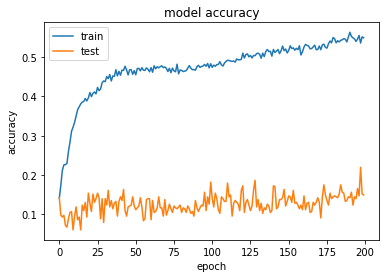

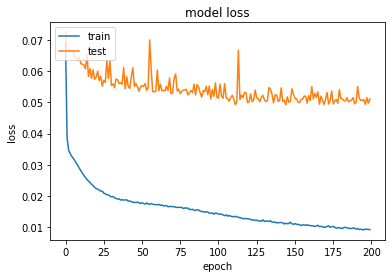

In [29]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Những gì mình thấy ở đây là mô hình này kết quả khá dỏm, tuy lúc trên mình đào tạo máy học rất nhanh nhưng đối nghịch lại là tập đào tạo train thì kết quả siêu tốt nhưng tập thử nghiệm thì tệ vô cùng khác xa thực tế. Như mình đã đề cập trong phần hướng dẫn trên, vấn đề mình gặp phải như trên chính là overfitting, tập đào tạo thì tốt, nhưng kết quả thực nghiệm lại khác xa thực tế!
![image](https://i.imgur.com/c3Emq0A.png)  


Chính vì thế mình sẽ giải quyết vấn đề này, bằng __Giải quyết high variance (overfitting)__ là cần tăng độ phong phú của dữ liệu model
* Thu thập thêm dữ liệu hoặc dùng tăng dữ liệu data augmentation (mình đã trình bày phía trên)
* Dùng regularization như: L1, L2, __droupout?__

Và đồng thời, mình cũng sẽ "nâng cấp" mô hình hơn để xem kết quả sẽ thế nào bằng cách tăng độ phức tạp của model, mà ta thường dùng để __Giải quyết high bias (underfitting)__ 
* Tăng số lượng hidden layer và số node trong mỗi hidden layer.
* Dùng nhiều epochs hơn để train model.  
  
Tuy nhiên mình thử nghiệm xem, kết quả dò điểm trên khuôn mặt thực tế ra cho mình xem sẽ thế nào.

In [32]:
img = X_train[0, :, :, :].reshape(1, -1)
predictions = model.predict(img)

In [33]:
img

array([[0.93333333, 0.9254902 , 0.92941176, ..., 0.2745098 , 0.29411765,
        0.35294118]])

In [34]:
xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)


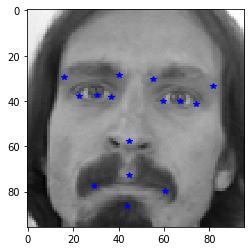

In [35]:
plt.imshow(X_train[0, :, :, 0], cmap='gray')
plt.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'b*')

In [39]:
def plot_faces_with_keypoints_and_predictions(model, nrows=5, ncols=5, model_input='flat'):
    """Mình viết hàm để xuất mẫu 25 hình đã gắn kết quả tra điểm vị trí quan trọng trên khuôn mặt."""
    selection = np.random.choice(np.arange(X.shape[0]), size=(nrows*ncols), replace=False)
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for ind, ax in zip(selection, axes.ravel()):
        img = X_train[ind, :, :, 0]
        if model_input == 'flat':
            predictions = model.predict(img.reshape(1, -1))
        else:
            predictions = model.predict(img[np.newaxis, :, :, np.newaxis])
        xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)
        ax.imshow(img, cmap='gray')
        ax.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'bo')
        ax.axis('off')

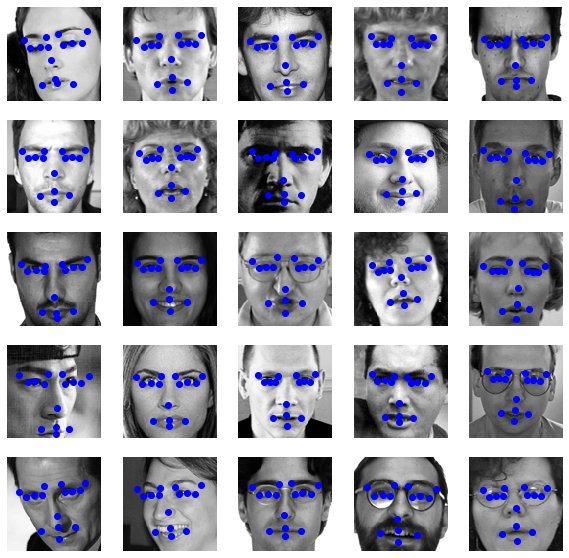

In [40]:
plot_faces_with_keypoints_and_predictions(model)

Kết quả trên như mình thấy cũng khá tốt, dù điểm có bị hơi lệt 1 ít. Mình sẽ cải tiến mô hình bằng cách Dropout các node và làm phẳng ma trận kết quả rút lại để tráng tình trạng overfitting. Nhưng trước hết mình phải hiểu __Dropout là gì? Và Flatten là gì?__

### <span style="color:red">*Dropout là gì?*</span>   
Dropout với hệ số p nghĩa là trong quá trình train model, với mỗi lần thực hiện cập nhật hệ số trong gradient descent ta ngẫu nhiên loại bỏ p% số lượng node trong layer đấy, hay nói cách khác là dữ lại (1-p%) node. Mỗi layer có thể có các hệ số dropout p khác nhau.
![image](https://i.imgur.com/Ju1693I.png) 
![image](https://i.imgur.com/wB4bwKy.png)
__Mục đích của dropout__ hạn chế việc overfitting  
* Overfitting là mô hình đang dùng quá phức tạp so với mô hình thật của dữ liệu, làm hàm model chỉ chuẩn đúng với dữ liệu nhất định, không có tính phổ quát hòa. Nên khi mình dùng dropout như hình trên thì rõ ràng mô hình bên phải đơn giản hơn => tránh overfitting.
 
* Thêm vào đó, vì mỗi bước khi train model thì ngẫu nhiên (1-p%) các node bị loại bỏ nên điểm quan trọng nhất! Là model không thể phụ thuộc vào bất kì node nào của layer trước mà thay vào đó có xu hướng trải đều weight, giống như trong L2 regularization => tránh được overfitting.
 
__Lời khuyên khi dùng dropout__  
Hệ số p nên ở khoảng [0.2, 0.5] . Nếu p quá nhỏ thì không có tác dụng chống overfitting, tuy nhiên nếu p quá lớn thì gần như loại bỏ layer đấy và có dễ dẫn đến underfitting.
Nên dùng model lớn, phức tạp hơn vì ta có dropout chống overfitting.

### <span style="color:red">*Flattening là gì?*</span>  
Sau khi ảnh được truyền qua nhiều convolutional layer và pooling layer thì model đã học được tương đối các đặc điểm của ảnh (ví dụ mắt, mũi, khung mặt,…) thì tensor của output của layer cuối cùng, kích thước H*W*D, sẽ được chuyển về 1 vector kích thước (H*W*D)
![image](https://i.imgur.com/02WociF.png)



In [42]:
from keras.layers import Dropout, Flatten

Trước khi vào mô hình chính, mình cần phải hiểu rõ BatchNormalization là gì và các vấn đề xử lý ảnh cơ bản để làm dữ liệu hóa ảnh trực quan rất nhiều với các bộ lọc. Khi đó mình sẽ thấy kết quả sẽ cải thiện lên rất nhiều lần!

### <span style="color:red">*Tensor là gì?*</span>  
![image](https://i.imgur.com/rxT8kOy.png)
Tưởng tượng mặt đáy là một ma trận kích thước a * b, được tạo bởi b vector kích thước a. Cả hình hộp là tensor 3 chiều kích thước a*b*h, được tạo bởi xếp h ma trận kích thước a*b lên nhau  
![image](https://i.imgur.com/lzZf3Nk.png)
Do đó biểu diễn ảnh màu trên máy tính ở phần trên sẽ được biểu diễn dưới dạng tensor 3 chiều kích thước 600*800*3 ( 3 ma trận (channel) 3 kênh màu red, green, blue kích thước 600*800 chồng lên nhau). Ví dụ biểu diễn ảnh màu kích thước 28*28, biểu diễn dưới dạng tensor 28*28*3:  
![image](https://i.imgur.com/EvjuR2m.png)
![image](https://i.imgur.com/5u6RRnO.png)  
### <span style="color:red">*Convolution là gì?*</span>  
Để cho dễ hình dung mình sẽ lấy ví dụ trên ảnh xám, tức là ảnh được biểu diễn dưới dạng ma trận A kích thước m*n. Ta định nghĩa kernel là một ma trận vuông kích thước k*k trong đó k là số lẻ. k có thể bằng 1, 3, 5, 7, 9,… Ví dụ kernel kích thước 3*3:
![image](https://i.imgur.com/t5QXhFc.png) 
Với mỗi phần tử (x)ij trong ma trận X lấy 1 ma trận A (vùng màu cam) bằng kích thước kernel W có  (x)ij là trung tâm, đó cũng là lý do tại sao ma trận kernel thường lẻ. Sau đó tuần tự tính tổng ma trận A với ma trận kernel W ra ma trận Y
![image](https://i.imgur.com/Ckml8zn.png) 
![image](https://i.imgur.com/h8Im25e.png)
Mục đích của phép tính convolution trên ảnh là làm mở, làm nét ảnh; xác định các đường;… Mỗi kernel khác nhau thì sẽ phép tính convolution sẽ có ý nghĩa khác nhau. Ví dụ:
![image](https://i.imgur.com/vthobYe.png)

## <span style="color:red">Convolutional Neural Network (CNN). Ứng dụng xử lý convolution trong mô hình Neural network
</span>  
Nếu như mình có  ảnh màu kích thước 64*64 được biểu diễn dưới dạng 1 tensor 64*64*3 (3 kênh màu). Nên để biểu thị hết nội dung của bức ảnh thì cần truyền vào input layer tất cả các pixel (64*64*3 = 12288). Nghĩa là input layer giờ có 12288 nodes!!! Qúa lớn!
![image](https://i.imgur.com/ZKTnxRo.png)  
Chưa hết, giả sử số lượng node trong hidden layer 1 là 1000. Số lượng weight W giữa input layer và hidden layer 1 là 12288*1000 = 12288000, số lượng bias là 1000 (tương ứng với từng node trong 1 hidden layer) => tổng số tham số là: 12289000. Đấy mới chỉ là số parameter giữa input layer và hidden layer 1, trong model còn nhiều layer nữa, và nếu kích thước ảnh tăng, ví dụ 512*512 thì số lượng parameter tăng cực kì nhanh, càn khủng khiếp hơn nữa!!! => Cần giải pháp tốt hơn !!!
  
Từ đó, mình __suy nghĩ và tìm cách áp dụng xử lý ảnh vào mô hình giải quyết vấn đề:__   
* Trong ảnh các pixel ở cạnh nhau thường có liên kết với nhau hơn là những pixel ở xa. Ví dụ như phép tính convolution trên ảnh ở bài trước.
* Trong phép tính convolution trong ảnh, chỉ 1 kernel được dùng trên toàn bộ bức ảnh. Hay nói cách khác là các pixel ảnh chia sẻ hệ số với nhau.  
  
Như mình đã biết ảnh mình là ảnh màu được biểu diễn bằng 3 kênh màu đỏ, xanh biển, xanh lá nên mình sẽ biểu diễn dạng tensor 3 chiều. Nên mình cũng sẽ định nghĩa kernel là 1 tensor 3 chiều kích thước k*k*3 (3 là 3 kênh màu, là số mặt định, còn k chính là kích thước của kernel trong máy học, kernel luôn là ma trận vuông và có k luôn lẻ).
![image](https://i.imgur.com/rcVP06O.png) 
Mình định nghĩa kernel có cùng độ sâu (depth, ý là mình nói cùng có 3 kênh màu) với biểu diễn ảnh, rồi sau đó thực hiện di chuyển khối kernel tương tự như khi thực hiện trên ảnh xám.  
![image](https://i.imgur.com/xe1v6cD.png) 
![image](https://i.imgur.com/CaYcDx9.png)
Như Trong vùng đỏ hình trên, mình có:
* Output của phép tính convolution trên ảnh màu là 1 matrix.
* Có 1 hệ số bias được cộng vào sau bước tính tổng các phần tử của phép tính element-wise (mình bắt đầu thấy sẽ giống với mô hình máy học)  
   
Với mỗi kernel khác nhau, mình sẽ học được những đặc trưng, đặt điểm khác nhau của ảnh. Như mình đã biết, trong xử lý ảnh, mỗi loại ma trận filter duyệt cụm kernel sẽ trích xuất trên ảnh mỗi loại thành phần khác nhau (như làm mượt, lấy nét, lấy màu nổi….) sẽ nhanh hơn, chính xác hơn và tổng thể hơn rất nhiều lần khi chỉ đưa vào mô hình với mỗi điểm ảnh ứng 1 node rồi kích thước khủng như thế! Áp dụng xử lý ảnh sẽ giải quyết được những bài toán bên máy học thật sự phải cần xử lý ảnh!
   
Nên trong mỗi lớp convolutional layer (tương ứng là hidden layer) ta sẽ dùng nhiều kernel (tương ứng là node) để học được nhiều thuộc tính của ảnh. Vì mỗi 1 kernel cho ra output là 1 matrix nên k kernel sẽ cho ra k output matrix. Ta kết hợp k output matrix kết quả này lại thành 1 tensor 3 chiều có chiều sâu k. 
![image](https://i.imgur.com/SZ1L2Ge.png)
 
__Mình có thể tổng quát mô hình lại như sau:__
* Giả sử input của 1 convolutional layer tổng quát là tensor kích thước H * W * D.
* Kernel có kích thước F * F * D (kernel luôn có depth bằng depth của input và F là số lẻ), stride: S, padding: P.  
Convolutional layer áp dụng K kernel.  
Output của layer là tensor 3 chiều có kích thước:
![image](https://i.imgur.com/QweLKM7.png)  
* Output của convolutional layer (xem là hidden layer) sẽ qua hàm activation function (nghĩ là hàm sigmoid, hay RELU để phân loại theo kernel) trước khi trở thành input của convolutional layer tiếp theo.
* Tổng số parameter của layer: Mỗi kernel có kích thước F*F*D và có 1 hệ số bias, nên tổng parameter của 1 kernel là F*F*D + 1. Mà convolutional layer áp dụng K kernel => Tổng số parameter trong layer này là K * (F*F*D + 1).

### <span style="color:red">*Lớp Pooling layer là gì và để làm gì?*</span>  
__Mục đích:__ để giảm kích thước dữ liệu nhưng vẫn giữ được các thuộc tính quan trọng. Kích thước dữ liệu giảm giúp giảm việc tính toán trong model. Như mình đã biết trên, 1 mô hình gồm nhiều lớp convolutional layer (hidden layer) và trong mỗi layer sẽ có nhiều node (là k kernel) và Pooling layer thường được dùng giữa các convolutional layer đó, để giảm kích thước ảnh
![image](https://i.imgur.com/Ewfn1Sb.png) 
Như mình thấy trên mô hình trên, với mỗi lớp Convolution sẽ có quá trình Pooling xen kẽ. Mỗi lần pooling, kích thước tập ảnh sẽ giảm xuống. Vậy mình đã biết mục đích, nơi đặt, vậy thật ra nó là gì?  

Pooling layer là 1 ma trận kích thước K*K, đầu vào là tensor ảnh kích thước H*W*D (D là depth là độ sâu như ảnh màu 3 kênh màu độ sâu là 3), ta tách ra làm D ma trận kích thước H*W. Với mỗi ma trận, trên vùng kích thước K*K trên ma trận ta tìm maximum hoặc average của dữ liệu rồi viết vào ma trận kết quả. Quy tắc về stride và padding áp dụng như phép tính convolution trên ảnh.  
![image](https://i.imgur.com/b0j7F1n.png) 
Ví dụ hình trên là 1 trong 3 kênh màu với RGB, mình tách màu Xanh lá ra và chạy 1 ma trận vuông K*K ánh xạ lên vùng ma trận cần xét và chọn phần tử max hay trung bình điền vào ma trận khung kết quả, lúc này từ ma trận lớn 5x5 xuống còn 2x2!
![image](https://i.imgur.com/xMet8YJ.png)
Hình trên là cách lấy phần tử trung bình hay lớn nhất để chọn làm phần tử quyết định chèn vào ma trận kết quả đc giảm kích thước
![image](https://i.imgur.com/DaiV6xV.png)
Ví dụ hình trên chỉ là đen trắng, nhưng có độ sâu D = 64, đó là số K kernel, khi qua pooling kích thước ban đầu là 224*224 còn 112*112, giảm đi các thành phần không quan trọng và giữa lại các thành phần quan trọng

### <span style="color:red">*Ý nghĩa của Batch Normalization*</span>  
Batch Normalization là một phương pháp hiệu quả khi training một mô hình mạng nơ ron. Mục tiêu của phương pháp này chính là việc muốn chuẩn hóa các feature (đầu ra của mỗi layer sau khi đi qua các activation) về trạng thái zero-mean với độ lệch chuẩn 1. Vậy hiện tượng ngược lại đó là non-zero mean có ảnh hưởng như thế nào đến việc training mô hình:    
    
__1.Lý do:__  
  
* Thứ nhất có thể hiểu rằng __Non zero mean là hiện tượng dữ liệu không phân bố quanh giá trị 0, mà dữ liệu có phần nhiều giá trị lớn hơn không, hoặc nhỏ hơn không. Kết hợp với vấn đề high variance khiến dữ liệu trở nên có nhiều thành phần rất lớn hoặc rất nhỏ__. Vấn đề này rất phổ biến khi training các mạng nơ ron với số layer sâu. Việc feature không phân phối trong những khoảng ổn định (giá trị to nhỏ thất thường) sẽ có ảnh hưởng đến quá trình tối ưu của mạng. Vì như chúng ta đã biết việc tối ưu một mạng nơ ron sẽ cần phải sử dụng đến tính toán đạo hàm. Giả sử như một công thức tính layer đơn giản là y=(Wx+b) thì đạo hàm của y theo w có dạng:dy = dWx Như vậy giá trị x ảnh hưởng trực tiếp đến giá trị của đạo hàm. Do đó nếu x mang các giá trị thay đổi không ổn định dẫn đến đạo hàm sẽ có thể bị quá lớn, hoặc quá nhỏ dẫn đến việc learning model không được ổn định. Và điều đó cũng đồng nghĩa với việc chúng ta có thể sử dụng các learning rate cao hơn trong quá trình training khi sử dụng Batch Normalization.  
    
__2. Kết quả:__
* Batch normalization có thể giúp chúng ta __tránh được hiện tượng giá trị của x rơi vào khoảng bão hòa sau khi đi qua các hàm kích hoạt phi tuyển__. Vậy nên nó đảm bảo rằng không có sự kích hoạt nào bị vượt quá cao hoặc quá thấp. Điều này giúp cho các weights mà khi không dùng Batch NormalizationN có thể sẽ không bao giờ được học thì nay lại được học bình thường. Điều này giúp chúng ta làm giảm đi sự phụ thuộc vào giá trị khởi tạo của các tham số.  
    
* Batch Normalization còn có vai trò như một dạng của regularization giúp cho việc giảm thiểu overfiting. Sử dụng batch normalization, chúng ta sẽ không cần phải sử dụng quá nhiều dropput và điều này rất có ý nghĩa vì chúng ta sẽ không cần phải lo lắng vì bị mất quá nhiều thông tin khi dropout weigths của mạng. Tuy nhiên vẫn nên sử dụng kết hợp cả hai kĩ thuật này

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 96, 96, 1)         4         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 92, 92, 24)        624       
_________________________________________________________________
activation_3 (Activation)    (None, 92, 92, 24)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 46, 46, 24)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 46, 46, 24)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 42, 42, 36)        21636     
_________________________________________________________________
activation_4 (Activation)    (None, 42, 42, 36)       

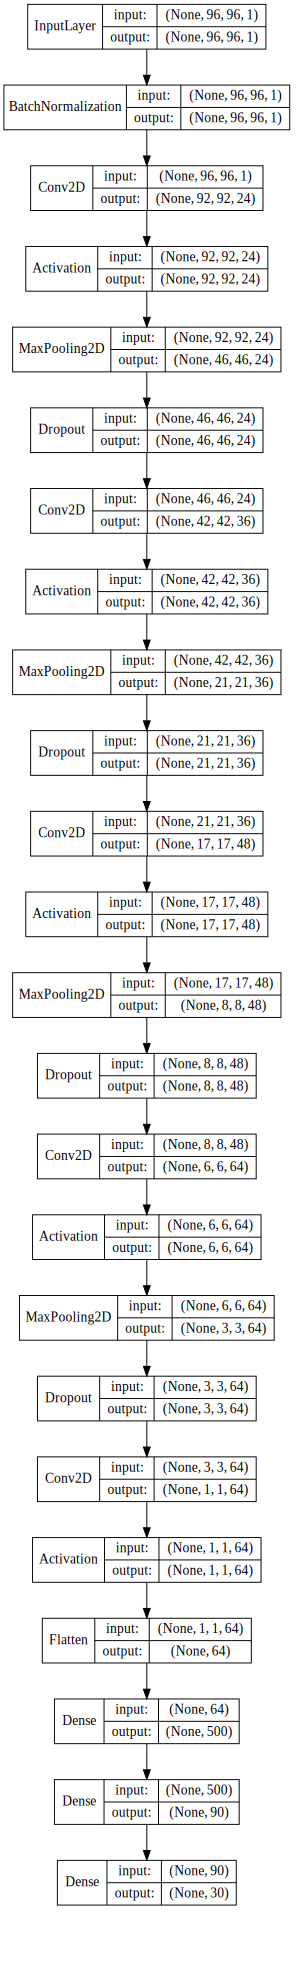

In [43]:
model = Sequential()
# input layer
model.add(BatchNormalization(input_shape=(96, 96, 1)))
model.add(Conv2D(24, (5, 5), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 2
model.add(Conv2D(36, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 3
model.add(Conv2D(48, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 4
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))
# layer 5
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Flatten())
# layer 6
model.add(Dense(500, activation="relu"))
# layer 7
model.add(Dense(90, activation="relu"))
# layer 8
model.add(Dense(30))

#Mình in mẫu sơ đồ đồ thị
model.summary()
plot_keras_model(model, show_shapes=True, show_layer_names=False)

Trước khi đào tạo mô hình, mình sẽ đi sâu vào 1 chút toán học mà Keras đã "giải" giúp mình:
# Khả năng "học": 
Mạng Neural networks học theo một quá trình gọi là backpropagation. Trong đó, các hàm .fit của Keras thực hiện quy trình này một cách tự động cho mình, vì vậy mình không phải viết mã bằng tay. Mình có thể tham khảo ở [neural networks demystified](https://youtu.be/UJwK6jAStmg?t=130) and [3Blue1Brown's back prop video](https://youtu.be/Ilg3gGewQ5U)

## Forward Propagation:
* Mạng nơ-ron nhận mầu vào và thực hiện một quá trình gọi là lan truyền về phía trước (forward propagation). Để hiểu backpropagation, trước tiên mình cần hiểu quá trình  forward propagation.
* Trong đó, mỗi đường kết nối mỗi nơ-ron trong mạng neural network được gọi là khớp thần kinh và mỗi đường giữ một giá trị "trọng lượng" (weight):
https://imgur.com/0tlMuFw
![image](https://i.imgur.com/0tlMuFw.png)

 1.  Đầu tiên,  forward propagation lấy một ma trận $X$ đầu vào và nhân các giá trị đó với ma trận trọng số lớp đầu tiên của mình (first layer) $W^1$. Trong trường hợp của mình, ma trận đầu vào là các giá trị pixel của hình ảnh của mình.

 2. Một khớp thần kinh là các đường (như trong hình) nối mỗi nơron trong mạng. Mỗi khớp thần kinh (đường) chứa một giá trị "độ ưu tiên, trọng số" (weight). Vì vậy, ma trận trọng số là tất cả các khớp thần kinh của lớp đầu tiên.  $Z^2$ (ma trận giá trị đầu vào của mình $X$ * $W^1$,  ma trận trọng sốcủa mình cho lớp đầu tiên + node bias $b$)
 
 3. là (ma trận đầu vào $X$ nhân ma trận trọng số $W^1$ + $b$ bias b) được truyền vào một hàm kích hoạt như sigmoid hoặc relu.  $a^2$ đại diện cho tất cả các giá trị trong lớp ẩn của nó.
 
 4. Bây giờ $a^2$ được chuyển tiếp và nhân với nhóm trọng số tiếp theo $W^2$  để cung cấp cho mình giá trị của $Z^3$ 
 5. Mình thực hiện quá trình tương tự như mình đã làm trong lớp đầu tiên. mình chuyển $Z^3$ vào hàm kích hoạt để có được giá trị đầu ra dự đoán của mình


Một lớp ẩn (hidden layer) trên chỉ chứa 3 nút nhưng việc truyền bá về phía trước (forward propagation) hoạt động giống trên các mạng thần kinh (neural networks) lớn hơn và phức tạp hơn. Về cơ bản, lớp sau cung cấp các giá trị đầu vào của lớp trước đó, chuyển tiếp mỗi lần và áp dụng phép nhân ma trận giữa ma trận đầu vào và trọng số cộng với độ lệch (bias). Sau đó, lớp đó áp dụng một hàm kích hoạt để chuyển các giá trị của nó vào phạm vi mong muốn (khoảng hiệu chỉnh). Tuy nhiên, bắt đầu bằng forward propagation lại sẽ tạo ra các giá trị dự đoán tồi tệ. Trong quá trình huấn luyện của mình, bạn có thể thấy mình chạy mẫu 1 ví dụ trong bộ test thì độ chính xác trong epoch đầu tiên là 50%. Back prop sẽ giúp điều chỉnh các giá trị trọng số weight  trong mạng của mình mới thực sự học hỏi.

## Back Propagation:

* Neural networks học bằng cách giảm thiểu 'chi phí' hoặc 'loss' function. Khi mạng neural network có đầu ra đưa ra một dự đoán sau khi lan truyền về phía trước (forward propagation), mình kiểm xem dự đoán này sai như thế nào bằng cách nhìn vàohàm chi phí (cost function). Hàm chi phí của mình (cost function) là một hàm "log loss function". Vì vậy, mình giảm thiểu hàm này bằng cách sử dụng  gradient descent.

* Trong quá trình gradient descent, mình lấy đạo hàm tại điểm trên đường cong. Đạo hàm này cho biết độ dốc của đường tiếp tuyến. Sau đó, mình  di chuyển điểm trên đường cong mất đi theo hướng dốc âm. Về cơ bản, mục đích là muốn hướng điểm trên đường mất (loss curve) về độ dốc âm vì mình muốn giảm thiểu hàm chi phí. Nhưng làm thế nào để chúng ta có được đạo hàm này?

ở mức cao ở back propagation là quá trình xác định những thay đổi đối với các trọng số và sai lệch trong mạng, sẽ là hiệu quả nhất và nhanh chóng để giảm cho hàm chi phí (cost function), dựa trên chỉ cần một ví dụ đào tạo duy nhất (single training example). Back propagation có thể xem là đệ quy vì có nghĩa là độ dốc của lớp đầu ra phụ thuộc vào độ dốc của lớp trước đó, rồi lại phụ thuộc vào độ dốc của lớp trước và cứ như vậy trên toàn mạng:
![image](https://i.imgur.com/jw71bFX.png)

* C0 đại diện cho giá trị chi phí, $C_0 = (a^L -y)^2$ . Hàm chi phí của chúng tôi là log loss
* $z^L$ = (ma trận trọng số $W^L$* các giá trị lớp trước $a^{L-1}$  + độ lệch bias $b^L$)
* $a^L$ là $Z^L$ được truyền vào hàm kích hoạt



##  Toán học: 
Với lan truyền ngược, cần 3 phương trình. Mình sử dụng các hàm phát sinh  khi thực hiện truyền ngược (back propagation) vì mình muốn xem các phần trọng điểm trong mạng  ảnh hưởng đến  cost function, trong khi mấy cái khác không đổi. Cũng như xem các trọng số (weights), bias, các lớp trước, tất cả đều riêng lẻ và ảnh hưởng đến hàm chi phí như thế nào (cost function).

1. $\frac{\partial C}{\partial W^L} = \frac{\partial C}{\partial a^L} \frac{\partial a^L}{\partial Z^L} \frac{\partial Z^L}{\partial W^L}$
* Với back propagation, mình cần tính toán độ nhạy (sensitive) của hàm chi phí ( cost function) đối với những thay đổi nhỏ trong trọng lượng: $W^L$. So $\frac{\partial C}{\partial W^L}$ = đạo hàm của hàm chi phí đối với trọng số

* Việc chỉnh trọng sốnày gây ra ảnh hưởng cho tất cả các thành phần khác trong mạng. Vì vậy, để tính toán, chúng tôi sử dụng quy tắc chuỗi từ phép tính.
    
    * $\frac{\partial Z^L}{\partial W^L} = a^{L-1}$ = Đạo hàm của $z^L$ với trọng số 
    * $\frac{\partial a^L}{\partial Z^L} = \sigma'(Z^L)$ =  Đạo hàm của hàm kích hoạt (activation function)
    * $\frac{\partial C_0}{\partial a^L} = 2(a^L - y)$ = Đạo hàm của hàm chi phí (cost function)
    * Vì vậy khi nhóm lại hết, đạo hàm của một tập  training example  của $W^L$  là $\frac{\partial C}{\partial W^L} = a^{L-1}\sigma'(Z^L)2(a^L - y)$

    * Nhưng đó chỉ là với một tập training example. Đạo hàm của cost function đầy đủ đòi hỏi phải tính trung bình trên tất cả các  training examples. 
![image](https://i.imgur.com/i6XFnDe.png)

2. Tuy nhiên, đó chỉ là một đạo hàm riêng mà mình cần. Bây giờ mình cần đạo hàm riêng của chi phí (cost) liên quan đến giá trị sai lệch (bias)!:. 
    * $\frac{\partial C}{\partial b^L} = \frac{\partial Z^L}{\partial b^L}\frac{\partial a^L}{\partial Z^L}\frac{\partial C}{\partial a^L}$
    * $\frac{\partial C}{\partial b^L}  = 1*\sigma'(Z^L)2(a^L - y)$

3. Cuối cùng, chúng ta cần đạo hàm riêng đối với lớp trước:
    * $\frac{\partial C}{\partial a^{L-1}} = \frac{\partial Z^L}{\partial a^{L-1}}\frac{\partial a^L}{\partial Z^L}\frac{\partial C}{\partial a^L}$
    * $\frac{\partial C}{\partial a^{L-1}}  = w^L\sigma'(Z^L)2(a^L - y)$

### Mình kết hợp tất cả phía trên lại với nhau: 
* Các phương trình trên được đơn giản hóa để có một nơron (neuron) trong mỗi lớp của một mạng đơn giản (simple network). Đây là cách chuẩn hơn thể kết hợp các phương trình cho việc tính toán đạo hàm back propagation:
![image](https://i.imgur.com/l1aegK4.png)
Thực chất là cùng một phương trình như trên, nhưng cải tiến hơn một chút là xử lý một mạng có nhiều hơn một nơron trong mỗi lớp, nơi mà các chỉ số jk lặp lại.
![image](https://i.imgur.com/zb7sl6R.png)
Đây là phương trình cuối cùng để cho back propagation. Như bạn có thể thấy, nó thay đổi một chút so với phương trình trước của mình.
* $\frac{\partial C_0}{\partial a_k^{L-1}}$ là đạo hàm của hàm chi phí (cost function ) (độ dốc (slope) của đường tiếp tuyến (tangent line) trên hàm chi phí) đối với lớp kích hoạt trước đó.

* Lấy tổng trên mọi lớp trong mạng
* $\frac{\partial Z_j^L}{\partial a_k^{L-1}}$ là đạo hàm của tổng trọng số của ((trọng số $W^L$ * các lớp trước $a^{L-1}$) + độ lệch bias) đối với lớp kích hoạt trước đó
* $\frac{\partial a^L}{\partial z_j^L}$ là đạo hàm của lớp kích hoạt hiện tại đối với tổng trọng số của  ((Trọng số (weights) $W^L$  * các lớp trước $a^{L-1}$) ) + độ lệch bias)

* $\frac{\partial C_0}{\partial a_j^L}$ là đạo hàm của hàm chi phí đối với lớp kích hoạt hiện tại

Mình  thoát khỏi ${\partial W_{jk}^L}$ đạo hàm liên quan với trọng số và  chuyển đổi nó thành ${\partial a_k^{L-1}}$ . Đó là đạo hàm của hàm chi phí (cost function) kích hoạt trong lớp L-1. Lý do chúng tôi làm điều này là do neuron ở $a_k^{L-1}$  có ảnh hưởng đến tất cả các neuron  trong lớp $a^L$ Dưới đây là một hình ảnh hữu ích mô tả điều này:
![image](https://i.imgur.com/8sbouMy.png)

Cần phải hiểu các phép toán này để mạng mình để thực hiện tốt? Rất may không phải code lại nhiều về toán, vì Keras thực hiện quá trình này tự động cho mình. Nhưng mình nghĩ thật thú vị khi đi xuống hố toán học. Back propagation rất là khó hiểu và thành thật mà nói, đôi khi mình vẫn bị lạc khi nhìn vào tất cả các phép tính. Nhiều lần mình vẫn phải đi xem lại và xem các video youtube để thử và rèn lại sự hiểu biết .

In [44]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.95, nesterov=True)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 50
history = model.fit(X_train, y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)

Train on 1712 samples, validate on 428 samples
Epoch 1/50
1712/1712 [==============================] - 40s 24ms/step - loss: 0.0378 - accuracy: 0.3113 - val_loss: 0.0703 - val_accuracy: 0.0327
Epoch 2/50
1712/1712 [==============================] - 40s 23ms/step - loss: 0.0351 - accuracy: 0.3359 - val_loss: 0.0704 - val_accuracy: 0.0327
Epoch 3/50
1712/1712 [==============================] - 39s 23ms/step - loss: 0.0326 - accuracy: 0.3511 - val_loss: 0.0690 - val_accuracy: 0.0607
Epoch 4/50
1712/1712 [==============================] - 41s 24ms/step - loss: 0.0270 - accuracy: 0.3750 - val_loss: 0.0620 - val_accuracy: 0.0374
Epoch 5/50
1712/1712 [==============================] - 39s 23ms/step - loss: 0.0226 - accuracy: 0.4048 - val_loss: 0.0528 - val_accuracy: 0.0678
Epoch 6/50
1712/1712 [==============================] - 37s 22ms/step - loss: 0.0197 - accuracy: 0.4357 - val_loss: 0.0498 - val_accuracy: 0.0607
Epoch 7/50
1712/1712 [==============================] - 37s 21ms/step - loss:

Như mình thấy trên, mô hình khá phức tạp nên kết quả "dạy học" chạy lâu hơn nhiều so với mô hình đơn giản ban đầu

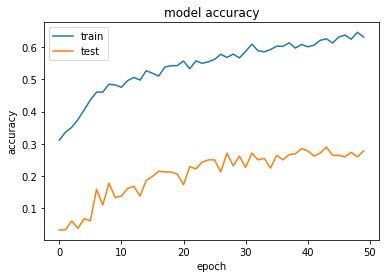

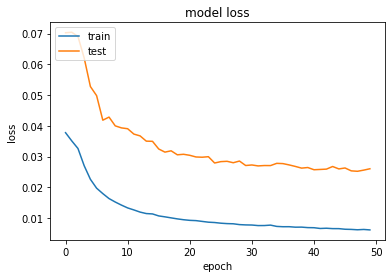

In [48]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

How good is the result?

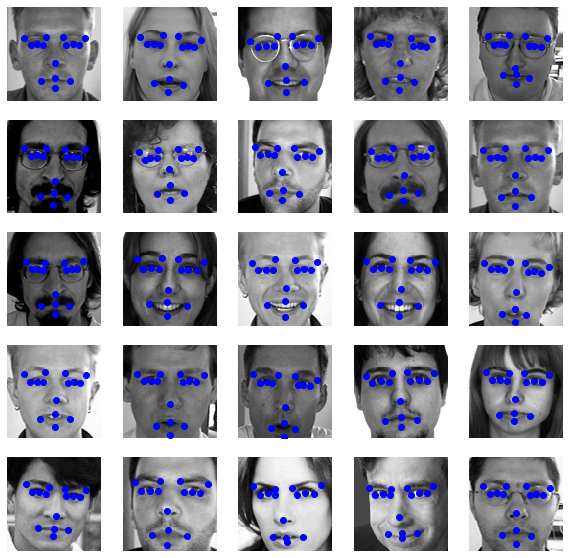

In [46]:
plot_faces_with_keypoints_and_predictions(model, model_input='2d')


Qua mo hình trên mình thấy kết quả cũng thật sự là khá tốt!  
Bây giờ mình sẽ sang phần ứng dụng vào thực tiễn, đó là ứng dụng chèn hiệu ứng ảnh tự động 

# ỨNG DỤNG

## Dán hiệu ứng lên khuôn mặt:
Đầu tiên mình phải tìm 1 ảnh PNG cái "râu" để dán lên mặt

In [45]:
import skimage.color
from skimage.filters import median

In [46]:
moustache = plt.imread('mustache-png-1317.png')
moustache = skimage.color.rgb2gray(moustache)

In [52]:
moustache = median(moustache, selem=np.ones((3, 3)))

C:\Users\ngdum\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


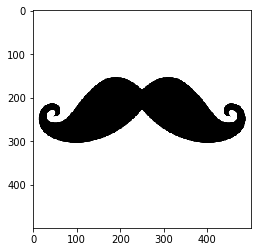

In [53]:
plt.imshow(moustache, cmap='gray')

Giờ mình sẽ chỉnh lại kích thước râu

In [54]:
from skimage import measure
moustache_contour = measure.find_contours(moustache, 0.8)[0]
moustache_contour -= np.array([250, 250])

Và mình viết một hàm vẽ một ria mép theo tỷ lệ tại một vị trí nhất định.

In [47]:
def plot_scaled_moustache(ax, center_xy, dx):
    """Tọa độ râu theoby  width, dx, ax."""
    moustache_scaled = moustache_contour.copy()
    moustache_scaled -= moustache_contour.min(axis=0)
    moustache_scaled /= moustache_scaled.max(axis=0)[1]
    deltas = moustache_scaled.max(axis=0) - moustache_scaled.min(axis=0)
    moustache_scaled -= np.array([deltas[0]/2, deltas[1]/2])
    moustache_scaled *= dx
    moustache_scaled += center_xy[::-1]
    ax.fill(moustache_scaled[:, 1], moustache_scaled[:, 0], "green", linewidth=4)

Mình thử in cái râu ra

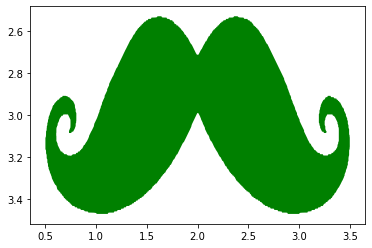

In [172]:
ax = plt.gca()
plot_scaled_moustache(ax, np.array([2, 3]), dx=3)
ax.invert_yaxis()

Cuối cùng, mình có thể tích hợp ảnh râu trên với khả năng dự đoán các điểm. Mình sẽ sử dụng vị trí tọa độ ở miệng và khoảng ria mép bằng kích thước của miệng.

In [98]:
def draw_moustache(predicted_points, ax):
    """Dán râu bằng cách dự đoán các điểm trên khuôn mặt."""
    dx = 2 * np.linalg.norm(predicted_points[12, :] - predicted_points[11, :])
    center_xy = predicted_points[13, :]
    plot_scaled_moustache(ax, center_xy, dx)

Mình thử nghiệm với ảnh đầu tiên trong tập huấn luyện.

In [99]:
img = X_train[0, :, :, :][np.newaxis, :, :, :]
predictions = model.predict(img)
xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)

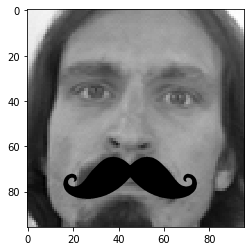

In [100]:
fig, ax = plt.subplots()
ax.imshow(X_train[0, :, :, 0], cmap='gray')
draw_moustache(xy_predictions, ax)

Ảnh khá là tốt, giờ mình sẽ viết hàm gán râu cho 1 dãy các ảnh

In [101]:
def plot_faces_with_moustaches(model, nrows=5, ncols=5, model_input='flat'):
    """Plots sampled faces with their truth and predictions."""
    selection = np.random.choice(np.arange(X.shape[0]), size=(nrows*ncols), replace=False)
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for ind, ax in zip(selection, axes.ravel()):
        img = X_train[ind, :, :, 0]
        if model_input == 'flat':
            predictions = model.predict(img.reshape(1, -1))
        else:
            predictions = model.predict(img[np.newaxis, :, :, np.newaxis])
        xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)
        ax.imshow(img, cmap='gray')
        draw_moustache(xy_predictions, ax)
        ax.axis('off')

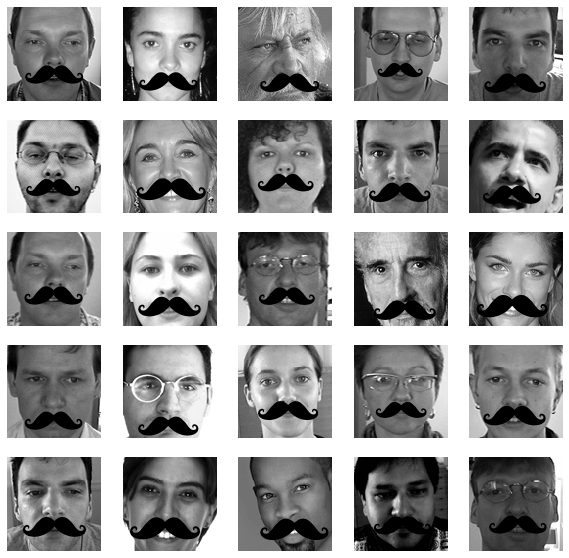

In [102]:
plot_faces_with_moustaches(model, model_input='2d')

Mình sẽ sẽ thử dáng râu vào ảnh thực tế

In [108]:
from skimage.io import imread
import cv2

In [165]:
portrait_urls = ["C/C1.jpg","C/C2.jpg","C/C3.jpg","C/C4.jpg","C/C5.jpg","C/C6.jpg","C/C7.jpg","C/C8.jpg","C/C9.jpg","C/C10.jpg"]



In [166]:
portraits = {}
for url in portrait_urls:
    if url not in portraits:
        portraits[url] = cv2.imread(url)

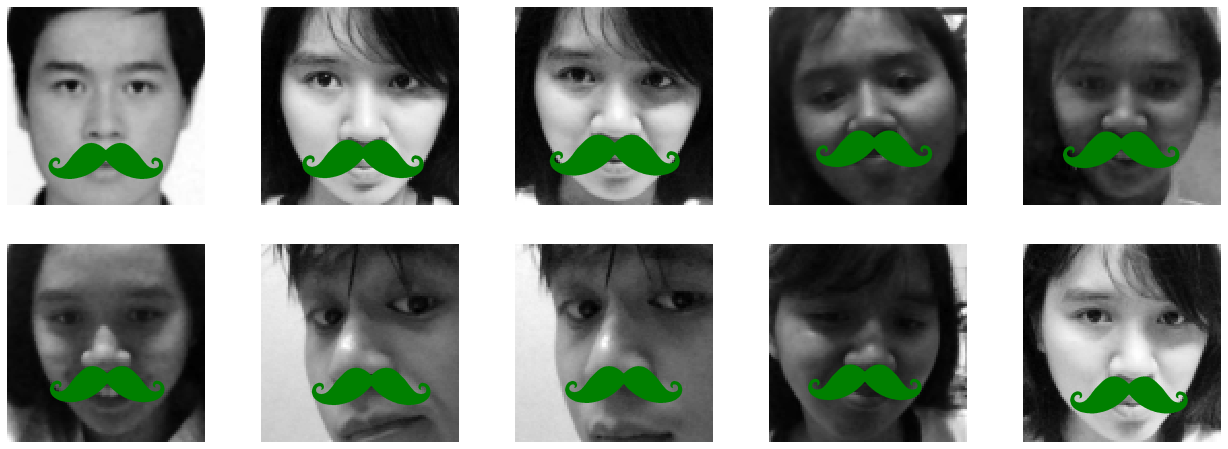

In [179]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(22, 8))
for img, ax in zip(portraits.values(), axes.ravel()):
    gray = (skimage.color.rgb2gray(img) * 255).astype(dtype='uint8')
    bounding_boxes = face_cascade.detectMultiScale(gray, 1.25, 6)
    for (x,y,w,h) in bounding_boxes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_rescaled = skimage.transform.resize(roi_gray, (96, 96))
        predictions = model.predict(roi_rescaled[np.newaxis, :, :, np.newaxis])
        xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)
        ax.imshow(roi_rescaled, cmap='gray')
        draw_moustache(xy_predictions, ax)
    ax.axis('off')

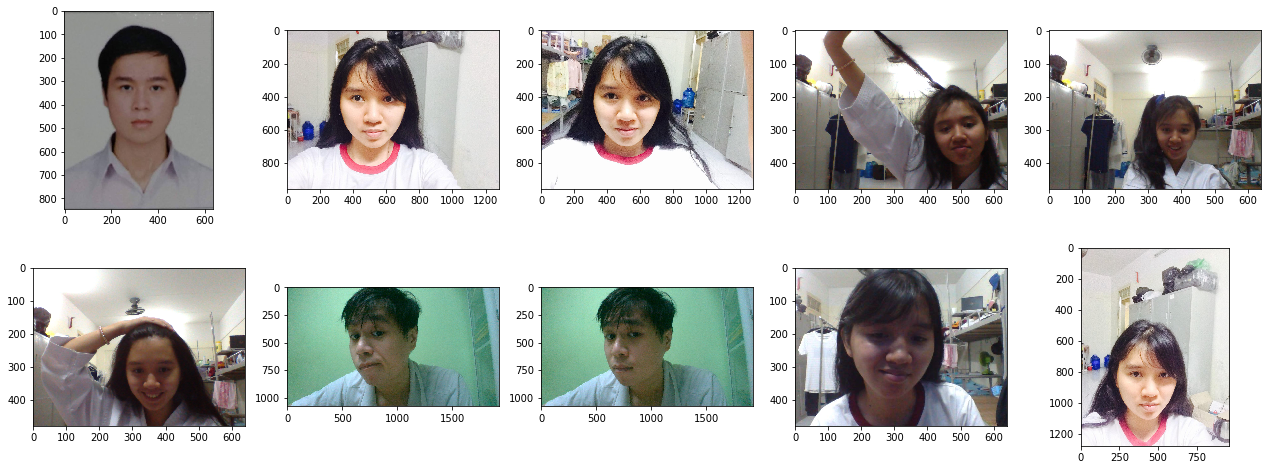

In [180]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(22, 8))
for img, ax in zip(portraits.values(), axes.ravel()):
    ax.imshow(img[...,::-1])
   # ax.axis('off')
    